<table>
    <tr>
        <td><img src="https://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-EIA.jpg" width="250"/></td>
        <td>&nbsp;</td>
        <td>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Clasificación  </p> Logística y Árboles </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">Diplomado 2025-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> Regresión Logística </FONT>

- Usamos regresión logística para estudiar la probabilidad de una variable categórica cualitativa (por ejemplo, dicotómica)  en función de una o más variables cuantitativas.

- En otras palabras, la regresión logística no permite clasificar directamente, pero si permite determinar una probabilidad de pertenecer a un grupo determinado de la variable categórica. Y luego, de acuerdo con esa probabilidad, tomar una decisión de asignación.

<FONT SIZE=4 COLOR="red"> Motivación al modelo </FONT>

Supongamos que tenemos una variable categórica con dos clase, que las llamaremos $\{0, 1\}$. Entonces, si tratamos de buscar un modelo lineal de la forma

$$y = \beta_0 +\beta_1 x_1 +\epsilon$$

donde $y$ es una variable binaria, no sería un bueno modelo ya que la izquierda de la expresión es continua. Luego, podríamos pensar en no tener una relación directa, sino vía la probabilidad, así:

$$P(y_i=1 \mid X = x_i)= \beta_0+\beta_1x_i$$

Cuando intentamos usar mínimos cuadrados, es fácil ver que el modelo no funciona ya que predecimos valores mayores que 1 y menores que 0.

<center><img src="https://github.com/Fabian830348/cursos/blob/0da91b828112d77dbddb387cbb7043ab8a78f252/Imagen/log1.png?raw=true" alt="centered image" width="500" height="400"></center>

podemos observar que este modelo no se ajusta a los datos. Más aún, si tratamos de predecir un valor, como $x=1.1$, al tratarse de una probabilidad, este valor no tiene sentido, pues es negativo.

Entonces, buscaremos una función cumpla lo siguiente

- $P(y_i=1 \mid X = x_i) = f(\beta_0 + \beta_1 x_i)$

- $P(y_i=1 \mid  x_i)$ sea creciente en $x$ para $\beta_1>0$.

- $P(y_i=1 \mid  x_i)$ sea decreciente en $x$ para $\beta_1<0$.

- $0 \leq P(y_i=1 \mid  x_i) \leq 1$ para todo valor de $x_i$.

Se puede ver rápidamente que la función debería tener una forma de S. A esta función se le denomina función sigmoide y es la base del modelo logístico

$$f(x)= \dfrac{e^x}{1+e^x}$$

La gráfica de esta función es:

<center><img src="https://github.com/Fabian830348/cursos/blob/0da91b828112d77dbddb387cbb7043ab8a78f252/Imagen/log2.png?raw=true" alt="centered image" width="500" height="400"></center>

Así pues, tenemos una expresión de la forma

$$P(y_i=1 \mid  X = x_i)= \dfrac{e^{\beta_0+\beta_1x_i}}{1+e^{\beta_0+\beta_1x_i}}$$


## <FONT SIZE=4 COLOR="blue"> 1 Librerías de trabajo </FONT>

In [ ]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar k-nearest neiborg / logística
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics           import specificity_score
# selección de características
from sklearn.feature_selection import RFE

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de un problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada uno de los pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 3 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"

In [ ]:
# cargar los datos
diabetes= pd.read_csv(url)

In [ ]:
# cabeza de los datos
diabetes.head()

## <FONT SIZE=4 COLOR="blue"> 4 Conjunto de Entrenamiento y Prueba </FONT>

- **data training:** Datos que usamos para entrenar el modelo.

- **testing data:** Datos que reservamos para comprobar si el modelo generado a partir de los datos funciona

Normalmente, usamos $70\%-30\%$ / $80\%-20\%$

In [ ]:
# 1. definir variables
# variables predictoras
X = diabetes.drop("Outcome", axis=1)
# variable objetivo
y = diabetes.Outcome

# 2. train y test
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify = y,             # estratificar la muestra
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.2)          # tamaño del conjunto de prueba

# 3. escalar los datos
# esta es la función para escalar los datos
escalar = StandardScaler()
# escalar tanto el X_train como el X_test.
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Modelo
reg_log= LogisticRegression(random_state=0)

# 5. Entrenamiento
reg_log.fit(X_train_s, y_train)

# matriz de confusión
y_pred_log = reg_log.predict(X_test_s)
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

# métricas
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_log),
          recall_score(y_test,y_pred_log),
          specificity_score(y_test,y_pred_log),
          precision_score(y_test,y_pred_log),
          f1_score(y_test,y_pred_log)]
pd.DataFrame({"metrics": metrics , "values" : values})

[[89 11]
 [23 31]]


,metrics,values
0,accuracy,0.779221
1,recall,0.574074
2,specificidad,0.890000
3,precision,0.738095
4,f1,0.645833


vecinos más cercanos

In [ ]:
# 1. definir variables
# variables predictoras
X = diabetes.drop("Outcome", axis=1)
# variable objetivo
y = diabetes.Outcome

# 2. train y test
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify = y,             # estratificar la muestra
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.2)          # tamaño del conjunto de prueba

# 3. escalar los datos
# esta es la función para escalar los datos
escalar = StandardScaler()
# escalar tanto el X_train como el X_test.
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Modelo
knn = KNeighborsClassifier(n_neighbors=9)

# 5. Entrenamiento
knn.fit(X_train_s, y_train)

# matriz de confusión
y_pred_knn = knn.predict(X_test_s)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

# métricas
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_knn),
          recall_score(y_test,y_pred_knn),
          specificity_score(y_test,y_pred_knn),
          precision_score(y_test,y_pred_knn),
          f1_score(y_test,y_pred_knn)]
pd.DataFrame({"metrics": metrics , "values" : values})

[[90 10]
 [24 30]]


,metrics,values
0,accuracy,0.779221
1,recall,0.555556
2,specificidad,0.900000
3,precision,0.750000
4,f1,0.638298


In [ ]:
# Le indico que me seleccione las 5 variables más importantes
rfe=RFE(reg_log, n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe.ranking_
X.columns[rfe.ranking_== 1]

# <FONT SIZE=5 COLOR="purple"> 2. Árboles de Decisión </FONT>

- El enfoque de clasificación y regresión vía árboles (CART, classification and regression tree) fue desarrollado por Breiman et al. (1984).

- Un árbol de decisión es una estructura que incluye un ***nodo raíz, nodos principales, ramas y nodos hoja***. Cada nodo interno denota una prueba sobre un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol también es llamado: **nodo raíz**.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree1.png?raw=true" alt="centered image" width="500" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Los términos que intervienen en el algoritmo de árbol de decisión son los siguientes

- ***Nodo raíz:***: Es el nodo inicial del árbol.

- ***División:*** Es un proceso de división de un nodo en dos o más subnodos.

- ***Nodo de decisión***: Cuando un subnodo se divide en otros subnodos, se denomina nodo de decisión.

- ***Nodo hoja/terminal***: Son los nodos que no se dividen más.

- ***Rama/Subárbol***:  Una subsección de un árbol completo que inicia con un nodo principal.

- ***Profundidad:*** Es el número de niveles de decisión en el árbol.

- ***Poda***: Es el proceso de eliminar nodos de decisión con el fin de hacer el árbol más pequeño

Esta técnica de machine learning toma una serie de decisiones binarias en forma de árbol. Los nodos intermedios (las ramas) representan soluciones y los nodos finales (las hojas) nos dan la predicción que buscamos.

Para seleccionar las condiciones que conforman el árbol se usan dos elementos que se describirán más adelante.

  - Indice de Gini
  - Ganancia de Información (Entropía)


Lo primero que debemos indicar es que el algoritmo se basa en una serie de decisiones binarias, que gráficamente, no es más que una división de una región del plano donde están los datos.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree2.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Esta división se hace con el fin de separar un conjunto de puntos en las clases correspondientes. Consideremos el siguiente conjunto de puntos:

$$\{(x_i,y_i) \mid i = 1,2,3, \dots 29\}$$

<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree13.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Buscamos hacer divisiones rectangulares con el fin de separar los puntos. Para esto debemos iniciar con una condición, pero ¿cómo se hace esto?

Para responder está pregunta debemos hacer una grilla o cuadrícula tomando como referencia puntos entre cada $(x_i,x_{i+1}$) y $(y_i,y_{i+1})$.Por lo general se toma el punto medio

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree3.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Ahora, debemos determinar cuál condición $x \leq x_i$ o $y \leq y_j$ es más apropiada para iniciar. Esta condición nos dará el nodo raíz que es el inicio del algoritmo.

Es en este punto donde debemos tener un criterio de decisión. Para ello hay dos alternativas: usar el índice de Gini o la Entropía, con el fin de determinar la mejor condición.

- El índice de Gini dice que, si seleccionamos al azar dos elementos de una población, deben ser de la misma clase y la probabilidad de que esto ocurra es 1 si la población es pura. En otras palabras, este índice permite determinar si un conjunto de puntos es homogéneo o no.

- Este índice funciona con la variable objetivo categórica "Éxito" o "Fracaso". Sólo realiza divisiones binarias.

*Cuanto menor sea el valor de Gini, mayor será la homogeneidad.*

- El **índice de Gini** está dado en general como:

$$Gini = 1-\sum \limits_{k=1}^{n}p_k^2$$

donde $p_k$ es la probabilidad de seleccionar un objeto de la clase $k$ en un determinado nodo.

Veamos un ejemplo de dos condiciones:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree14.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Ahora bien, para determinar si elegimos una condición o no, usaremos el concepto de *impureza*, que se define de la siguiente manera

$$\text{Impureza de un nodo} = (Gini) \times (\text{Ponderacion de los nodos})$$

Supongamos que en nuestro ejemplo ( de los puntos dados arriba) queremos saber cuál condición es mejor, es decir, tiene un nivel de impureza menor.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree5.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Es importante resaltar que el algoritmo compara todas las impurezas y escoje la menor. En ese sentido, la función de costo para los árboles de clasificación es:

$$\text{función de costo} = 1-\sum \limits_{k=1}^{n}p_k^2$$

Partiendo de esta condición, comenzamos la división en el árbol buscando minimizar esta función.

En las siguientes imágenes se observan las divisiones del árbol para diferentes valores

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree4.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree6.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/tree/tree7.png?raw=true" alt="centered image" width="650" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

**Observación:** El método de árboles de decisión busca minimizar el índice de Gini y esto se puede lograr dividiendo el árbol de manera exhaustiva. Es decir, practicamente que cada punto este en una región. Pero esto es malo, ya que estamos *sobreajustando* el modelo. En otras palabras, el modelo clasifica perfectamente los datos del conjunto de entrenamiento pero no clasificará bien en los datos de prueba.

Veamos cómo funciona e Python

In [ ]:
max_depth = 10,          # Profundidad del árbol
                                    criterion = "gini",      # Función de costo.
                                    random_state = 123)      # Semilla

In [ ]:
from sklearn.tree             import DecisionTreeClassifier
from sklearn.tree             import export_graphviz
from graphviz                 import Source

# Generamos el modelo
model_Tree = DecisionTreeClassifier(max_depth=3)

# Entrenamos el modelo
model_Tree.fit(X_train, y_train)

# Prediccion de las clases vía el modelo DecisionTree.
y_pred_tree = model_Tree.predict(X_test)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree)
print(cm)

# métricas
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_tree),
          recall_score(y_test,y_pred_tree),
          specificity_score(y_test,y_pred_tree),
          precision_score(y_test,y_pred_tree),
          f1_score(y_test,y_pred_tree)]
pd.DataFrame({"metrics": metrics , "values" : values})


[[85 15]
 [16 38]]


,metrics,values
0,accuracy,0.798701
1,recall,0.703704
2,specificidad,0.850000
3,precision,0.716981
4,f1,0.710280


In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Profundidad del árbol: 3
Número de nodos terminales: 8


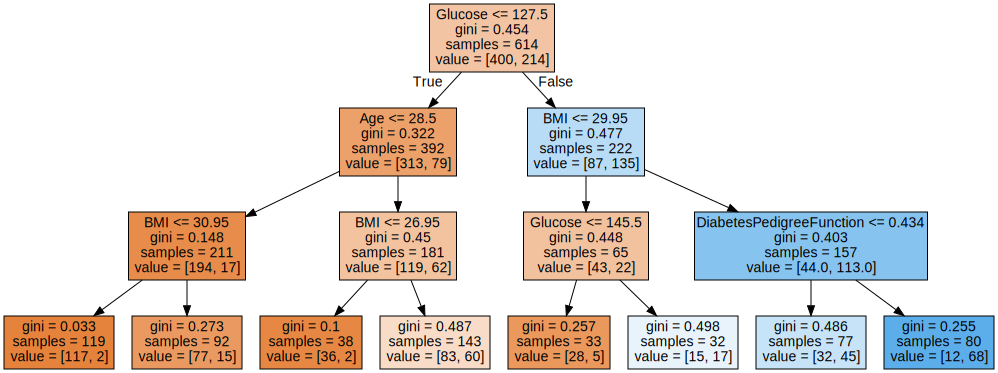

In [ ]:
# Revisamos la profundidad y el número de nodos terminales
print(f"Profundidad del árbol: {model_Tree.get_depth()}")
print(f"Número de nodos terminales: {model_Tree.get_n_leaves()}")
# Generamos el árbol
dot_data = export_graphviz(model_Tree,                           # modelo
                           feature_names = X.columns,            # columnas de entrenamiento
                           filled=True,)                         # colores del árbol (relleno)
Source(dot_data, format="png")

# <FONT SIZE=5 COLOR="purple"> 7. Optimicemos el valor de k </FONT>

Para esto podemos programar una función que itere sobre $k$ de la siguiente manera.

In [ ]:
k_range = range(1, 20) # rango de k. k desde 1 a 20.
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel("# de vecinos k")
plt.ylabel("accuracy")
plt.scatter(k_range, scores)
plt.xticks(range(1,20))

Podemos volver a ejecutar el modelo con $k=16$

# <FONT SIZE=5 COLOR="bronw"> 8. Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba y luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionados. Sin emabrgo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validacion = KFold(10)                               # divide los datos en 10 pliegues.
resultados = cross_val_score(KNN,                          # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = kfold_validacion,        # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

# <FONT SIZE=5 COLOR="bronw"> 9. Búsqueda en Grilla </FONT>

- La ***búsqueda en grilla*** (grid search) es una método que buscar las mejores combinaciones de parámetros que hacen que un modelo tenga el error más bajo, es decir, estimaciones más precisas.

- En cada combinación de parámetros, la búsqueda en grilla aplica el proceso de *cross-validation* con el fin de dar una mejor evaluación del modelo en cada punto.

- Cuando hablamos de búsqueda en grilla tenemos algunas alternativas. La primera se denomina propiamente *Grid Search* y en este método, se toman todas las combinaciones posibles de los hiperparámetros que se van a revisar. Como se ilustra en la siguiente gráfica

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid1.png?raw=true?" alt="centered image" width="600" height="350"></center>
<br>

In [ ]:
from sklearn.model_selection import GridSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 20)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                            # el modelo aplicado
                  grid_params,                             # los parámetros que van a variar
                  cv = 10,                                 # el número de folds
                  verbose = 3)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train,y_train)

Ahora, buscamos el mejor *score*

In [ ]:
print("Mejor score: ",g_res.best_score_)

Finalmente, los hiperparámetros que lograron ese *score*

In [ ]:
print("Mejores hiperparámetros", g_res.best_params_)